In [161]:

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df = pd.read_csv('ODI-2022.csv', sep=";")
keep_df= pd.read_csv('ODI-2022.csv', sep=";")

df = df.rename(columns={'Tijdstempel':'Timestamp', 'What programme are you in?':'Programme',
       'Have you taken a course on machine learning?':'ML exp.',
       'Have you taken a course on information retrieval?':'IR exp.',
       'Have you taken a course on statistics?':'Stats exp.',
       'Have you taken a course on databases?':'DB exp.', 'What is your gender?':'Gender',
       'Chocolate makes you.....':'Chocolate', 'When is your birthday (date)?':'DOB',
       'Number of neighbors sitting around you?':'Neighbors', 'Did you stand up?':'Standup',
       'What is your stress level (0-100)?':'Stress',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ':'money',
       'Give a random number':'rn', 'Time you went to be Yesterday':'sleeptime',
       'What makes a good day for you (1)?':'good day 1',
       'What makes a good day for you (2)?':'good day 2'})
#Clean the programme column
df.head()


,Timestamp,Programme,ML exp.,IR exp.,Stats exp.,DB exp.,Gender,Chocolate,DOB,Neighbors,Standup,Stress,money,rn,sleeptime,good day 1,good day 2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [162]:
#Cleanup programme column 


df['Programme'].unique()  #get distinct value in the program column


df.loc[df['Programme'].str.contains('bio', case=False), 'Programme'] = 'Biomedical/informatics'

df.loc[df['Programme'].str.contains('artificial', case=False), 'Programme'] = 'Artificial Intelligence'
df.loc[df['Programme'].str.contains('AI', case=True), 'Programme'] = 'Artificial Intelligence'

df.loc[df['Programme'].str.contains('computational', case=False), 'Programme'] = 'Computational Science'
df.loc[df['Programme'].str.contains('CLS', case=True), 'Programme'] = 'Computational Science'

df.loc[df['Programme'].str.contains('computer', case=False), 'Programme'] = 'Computer Science'
df.loc[df['Programme'].str.contains('CS', case=True), 'Programme'] = 'Computer Science'

df.loc[df['Programme'].str.contains('econometrics|e&or|eor', case=False), 'Programme'] = 'Econometrics'


df.loc[df['Programme'].str.contains('finance|fin', case=False), 'Programme'] = 'Finance'

df.loc[df['Programme'].str.contains('qrm|quant', case=False), 'Programme'] = 'QRM'

df.loc[df['Programme'].str.contains('business', case=False), 'Programme'] = 'Business Analytics'
df.loc[df['Programme'].str.contains('BA', case=True), 'Programme'] = 'Business Analytics'


df.loc[df['Programme'].str.contains('ds|data science', case=False), 'Programme'] = 'Data Science'

df.loc[~df['Programme'].str.contains('artificial|comput|econometrics|finance|qrm|business|bio|data science|human', case=False), 'Programme'] = 'Other'


In [163]:

#Clean the ML column

df.loc[df['ML exp.'].str.contains('yes', case=False), 'ML exp.'] = 'Yes'
df.loc[~df['ML exp.'].str.contains('unknown|Yes', case=False), 'ML exp.'] ='No'
df.loc[df['ML exp.'].str.contains('unknown', case=False), 'ML exp.'] =None


#Clean the IR column
df['IR exp.'] = df['IR exp.'].apply(lambda x: "Yes" if str(x) == '1' else x)
df['IR exp.'] = df['IR exp.'].apply(lambda x: "No" if str(x) == '0' else x)
df.loc[df['IR exp.'].str.contains('unknown', case=False), 'IR exp.'] = None


In [164]:

#Clean the stats column

df.loc[df['Stats exp.'].str.contains('mu', case=False), 'Stats exp.'] = 'No'
df.loc[df['Stats exp.'].str.contains('sigma', case=False), 'Stats exp.'] = 'Yes'
df.loc[df['Stats exp.'].str.contains('unknown', case=False), 'Stats exp.'] = None


#Clean the database column

df.loc[df['DB exp.'].str.contains('nee', case=False), 'DB exp.'] = 'No'
df.loc[df['DB exp.'].str.contains('ja', case=False), 'DB exp.'] = 'Yes'
df.loc[df['DB exp.'].str.contains('unknown', case=False), 'DB exp.'] = None


In [165]:

#Clean the neighbours column

df.loc[ df['Neighbors'].str.contains('a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|q|r|s|t|u|v|w|x|y|z|>|<', case=False) , 'Neighbors'] = '0'

df['Neighbors'] = df['Neighbors'].apply(lambda x: int(x) if int(x)>=0 else 0)



In [166]:

#Clean the standup column

df.loc[df['Standup'].str.contains('yes', case=False), 'Standup'] = 'Yes'
df.loc[~df['Standup'].str.contains('unknown|yes', case=False), 'Standup'] ='No'
df.loc[df['Standup'].str.contains('unknown', case=False), 'Standup'] =None


In [167]:

#Clean the stress column

df.loc[ df['Stress'].str.contains('-|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|q|r|s|t|u|v|w|x|y|z', case=False) , 'Stress'] = '42.42'

df['Stress'] = df['Stress'].apply(lambda x: float(x) if float(x)>=0 else 0)

df['Stress'] = df['Stress'].apply(lambda x: float(x) if float(x)<=100 else 100)
df['Stress'] = df['Stress'].apply(lambda x: None if x==42.42 else x)



In [168]:
#Clean birthday


df.loc[df['DOB'].str.contains('a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|q|r|s|t|u|v|w|x|y|z', case=False), 'DOB'] = '01-01-2100'
df.loc[~df['DOB'].str.contains('/|-|.'), 'DOB'] = '01-01-2100'

df['DOB'] = df['DOB'].apply(lambda x: x if len(x)>9 else '01-01-2100')

df.loc[df['DOB'].str.contains('1057', case=False), 'DOB'] = '01-01-2100'
df.loc[df['DOB'].str.contains('01-01-2100', case=False), 'DOB'] = None


df['DOB'] = pd.to_datetime(df['DOB'])
df['DOB'] = df['DOB'].dt.date


In [169]:
#clean the You can get 100 euros if you win a local DM competition column

df['money'] = df['money'].apply(lambda x: "invalid" if str(x) == 'nan' else x)
df.loc[df['money'].str.contains(',|€|-|/|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|q|r|s|t|u|v|w|x|y|z', case=False), 'money'] = 'invalid'

df['money'] = df['money'].apply(lambda x: None if x =='invalid' else int(math.floor(float(x))))


In [170]:
df.head(10)

,Timestamp,Programme,ML exp.,IR exp.,Stats exp.,DB exp.,Gender,Chocolate,DOB,Neighbors,Standup,Stress,money,rn,sleeptime,good day 1,good day 2
0,4-5-2022 12:12:07,Artificial Intelligence,Yes,No,No,No,female,neither,1998-02-05,0,No,0.0,5.0,888,23:00,coffee,sun
1,4-5-2022 12:12:07,Other,Yes,No,No,No,male,fat,2000-02-29,0,Yes,100.0,1.0,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,Yes,Yes,No,Yes,male,fat,1998-06-29,1,No,0.0,100.0,9,x,0,0
3,4-5-2022 12:12:09,Biomedical/informatics,Yes,No,None,No,male,neither,NaT,0,No,20.0,100.0,31,14:00,good food,no stress
4,4-5-2022 12:12:15,Artificial Intelligence,Yes,Yes,No,Yes,male,fat,1997-03-10,0,No,2.0,100.0,86,07:20,Sunshine,Good Food
5,4-5-2022 12:12:20,Artificial Intelligence,No,None,Yes,None,female,fat,NaT,0,No,48.0,1000.0,87,2130,This lecture,Sun
6,4-5-2022 12:12:26,Artificial Intelligence,Yes,No,None,No,male,neither,NaT,1,No,20.0,0.0,6,00:35,sunshine,happiness
7,4-5-2022 12:12:29,Artificial Intelligence,Yes,No,None,Yes,male,neither,NaT,0,No,100.0,10.0,50,23,Rainy Day,Weekend
8,4-5-2022 12:12:29,Finance,Yes,No,No,Yes,male,neither,NaT,0,No,20.0,NaN,42,23:00,Food,Relaxation
9,4-5-2022 12:12:29,Artificial Intelligence,No,No,No,Yes,female,fat,2000-07-21,5,Yes,50.0,10.0,88,12 hours,"sun, friends and wine","relaxing, watching a show, hockey"


#### Analysis and relationship of variables

In [171]:
#Analysis on gender and stress
genderCount = df["Gender"].value_counts()
progCount = df['Programme'].value_counts()
print('Gender distribution:\n',genderCount)
print('Programme distribution:\n',progCount)


genderStress = df[["Gender", "Stress"]].groupby("Gender").mean()
print('Stress levels by gender:\n',genderStress)



Gender distribution:
 male                     183
female                   102
not willing to answer     12
gender fluid               6
intersex                   1
Name: Gender, dtype: int64
Programme distribution:
 Artificial Intelligence      111
Computational Science         38
Computer Science              37
Other                         31
Business Analytics            26
Biomedical/informatics        25
Econometrics                  18
QRM                            7
Finance                        4
Data Science                   4
Human Language Technology      3
Name: Programme, dtype: int64
Stress levels by gender:
                           Stress
Gender                          
female                 48.525253
gender fluid           75.750000
intersex               34.000000
male                   46.209551
not willing to answer  66.666667


In [172]:


#Programme and stress
progStressMean = df[['Programme', "Stress"]].groupby('Programme').mean()

progStressMedian = df[['Programme', "money"]].groupby('Programme').median()
print('Mean stress level by programme:\n',progStressMean)
print('Median stress level by programme:\n',progStressMedian)



Mean stress level by programme:
                               Stress
Programme                           
Artificial Intelligence    50.122642
Biomedical/informatics     39.000000
Business Analytics         41.192308
Computational Science      40.315789
Computer Science           56.702703
Data Science               43.000000
Econometrics               41.433333
Finance                    56.250000
Human Language Technology  34.166667
Other                      55.161290
QRM                        76.000000
Median stress level by programme:
                            money
Programme                       
Artificial Intelligence     20.0
Biomedical/informatics       6.0
Business Analytics           8.5
Computational Science       69.5
Computer Science            45.0
Data Science               100.0
Econometrics                 5.0
Finance                     99.0
Human Language Technology   50.0
Other                       50.0
QRM                         40.0


In [173]:
#Taking courses and stress levels

mlStress = df[['ML exp.', "Stress"]].groupby('ML exp.').mean()

expStress = df.groupby(['ML exp.','DB exp.','IR exp.', 'Stats exp.'])["Stress"].mean()

print('Machine learning experience/Stress levels \n', mlStress)
print('Machine learning,database, information ret., statisticsexperience/Stress levels \n', expStress)



Machine learning experience/Stress levels 
             Stress
ML exp.           
No       53.942593
Yes      44.775000
Machine learning,database, information ret., statisticsexperience/Stress levels 
 ML exp.  DB exp.  IR exp.  Stats exp.
No       No       No       No            60.333333
                           Yes           60.300000
                  Yes      No            49.666667
         Yes      No       No            47.142857
                           Yes           40.000000
                  Yes      No            47.300000
                           Yes           40.000000
Yes      No       No       No            49.052632
                           Yes           37.000000
                  Yes      No            60.750000
                           Yes           25.000000
         Yes      No       No            37.314286
                           Yes           39.833333
                  Yes      No            44.911111
                           Yes           35.83

In [174]:

#Course experience distribution

mlCount = df["ML exp."].value_counts()
irCount = df['IR exp.'].value_counts()
dbCount = df["DB exp."].value_counts()
statsCount = df['Stats exp.'].value_counts()
print('Have you taken a course on ML: \n',mlCount)
print('Have you taken a course on Info. retrieval: \n', irCount)
print('Have you taken a course on databases: \n',dbCount)
print('Have you taken a course on statistics: \n' ,statsCount)

Have you taken a course on ML: 
 Yes    185
No     112
Name: ML exp., dtype: int64
Have you taken a course on Info. retrieval: 
 No     202
Yes     75
Name: IR exp., dtype: int64
Have you taken a course on databases: 
 Yes    158
No     139
Name: DB exp., dtype: int64
Have you taken a course on statistics: 
 No     243
Yes     33
Name: Stats exp., dtype: int64


In [80]:
df.agg({'Stress' : ['max', 'min','mean','median'], 'money' : [ 'max','min','mean','median']})

,Stress,money
max,100.000000,1000000.000000
min,0.000000,0.000000
mean,48.184694,8652.907258
median,50.000000,25.000000


#### Some plots

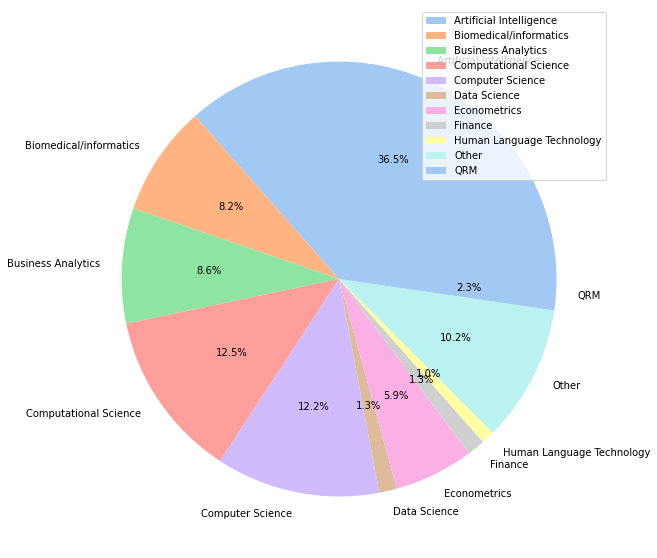

In [175]:
#Programme

pie_data = df.groupby('Programme').size()

# Seaborn color palette to plot pie chart
palette_color = sns.color_palette('pastel')


#palette_color = seaborn.color_palette('bright')
  
plt.figure(figsize=(10, 10))

# plotting data on chart
plt.pie(pie_data.values, labels=pie_data.index, colors=palette_color, autopct='%.1f%%')
plt.legend()
# displaying chart
plt.show()

array([[<AxesSubplot:title={'center':'Artificial Intelligence'}>,
        <AxesSubplot:title={'center':'Biomedical/informatics'}>,
        <AxesSubplot:title={'center':'Business Analytics'}>],
       [<AxesSubplot:title={'center':'Computational Science'}>,
        <AxesSubplot:title={'center':'Computer Science'}>,
        <AxesSubplot:title={'center':'Data Science'}>],
       [<AxesSubplot:title={'center':'Econometrics'}>,
        <AxesSubplot:title={'center':'Finance'}>,
        <AxesSubplot:title={'center':'Human Language Technology'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'QRM'}>, <AxesSubplot:>]],
      dtype=object)

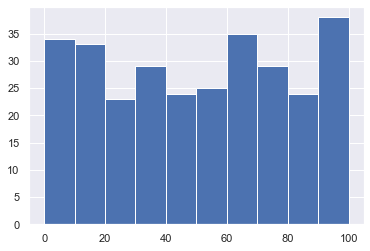

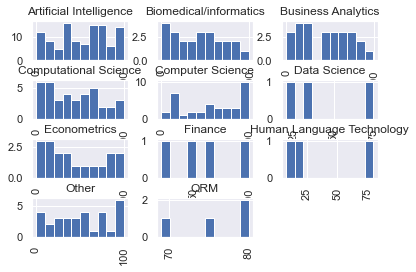

In [181]:
# Stress histograms
plt.hist(df['Stress'])
df['Stress'].hist(by=df['Programme'])

Text(0, 0.5, 'Mean Stress')

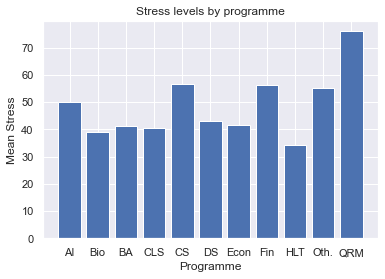

In [179]:
y = list(progStressMean.values.flatten())
x = ['AI','Bio' ,'BA'  ,'CLS' ,'CS' ,'DS' ,'Econ' ,'Fin','HLT','Oth.' ,'QRM']
plt.bar(x,y)
plt.title('Stress levels by programme')
plt.xlabel('Programme')
plt.ylabel('Mean Stress')